$%operadores de latex simplificados
\newcommand{\parder}[2]{\frac{\partial #1}{\partial #2}}            % Derivada Parcial
\newcommand{\pardder}[2]{\frac{\partial^2 #1}{\partial #2^2}}       % Derivada Parcial Segunda
\newcommand{\parddercross}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}  % Derivada Parcial Segunda cruzada
\newcommand{\pardern}[3]{\frac{\partial^{#3} #1}{\partial #2^{#3}}} % Derivada Parcial de orden #3
\newcommand{\totder}[2]{\frac{\text{d} #1}{\text{d} #2}}            % Derivada total
\newcommand{\totdder}[2]{\frac{\text{d}^2 #1}{\text{d} #2^2}}       % Derivada total Segunda
\newcommand{\totdern}[3]{\frac{\text{d}^{#3} #1}{\text{d} #2^{#3}}} % Derivada total de orden #3
\newcommand{\sustder}[2]{\frac{\text{D} #1}{\text{D} #2}}              % Derivada sustancial
\newcommand{\varg}{\phi}               % Variable genérica (escalar)
\newcommand{ \heat}{\dot{\mathcal{Q}}}
\newcommand{\half}{\frac{1}{2}}  
\newcommand{\xcoor}{x}                  % Coordenada x
\newcommand{\ycoor}{y}                  % Coordenada y
\newcommand{\varg}{\phi}               % Variable genérica (escalar)
\newcommand{\ii}{\textbf{i}}
$


# Diferencias finitas

El método de diferencias finitas se basa en discretizar el dominio espacial en una cantidad finita de nodos y escribir las Ecs. diferenciales de forma discreta en cada uno de los nodos o puntos discretos. Para discretizar un problema 1D se necesita un solo índice 

![title](dif_finitas.png)

En el caso de un problema 2D se necesitan dos. Por ejemplo, para un dominio rectangular

![title](dif_fin_2D.png)


En ambos pasos pasamos de una formulación contínua $$\phi(x, y)$$ a una formulación discreta $\phi(x_i, y_j)$
**La función solución $\phi$ sólo se conoce en los puntos discretos $(x_i, y_j)$.**
## Discretización de las ecuaciones

Para resolver PDEs es necesario evaluar derivadas de manera discreta y aproximada. Como la función $\varg$ se  conoce sólo en puntos discretos y se desea evaluar las derivadas de manera discreta, se emplea la **serie de Taylor** alrededor de $\xcoor_i$

$$
\begin{equation} 
  \begin{aligned}
    \varg(\xcoor) &= \varg(\xcoor_i) + (\xcoor - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\xcoor - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\xcoor - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} \\
    & \qquad + \cdots + \frac{(\xcoor - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
  \end{aligned}
\end{equation}
$$

si reemplazamos $x=x_{i+1}$ en dicha expresión obtenemos


$$
\begin{equation} 
     \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\color{red}{x_{i+1}} - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

podemos despejar la derivada primera  $\left.\parder{\varg}{\xcoor}\right|_{\xcoor_i}$ en función de $\varg(\color{red}{x_{i+1}}) $  y $ \varg(\xcoor_i)$

$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} = \frac{\varg(\color{red}{x_{i+1}}) - \varg(\xcoor_i)}{ (\color{red}{x_{i+1}} - \xcoor_i)}   - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!(\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} - \cdots - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Lo único que se conoce (o puede conocerse) del miembro derecho son  $\varg({x_{i+1}}) $  y $ \varg(\xcoor_i)$. Como el resto no se puede evaluar, se *trunca* la serie de Taylor hasta el primer orden, resultando
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i+1}}) - \varg(\xcoor_i)}{ ({x_{i+1}} - \xcoor_i)} 
\end{equation}
$$
obteniéndose un valor aproximado de la derivada. Esta aproximación será suficiente siempre y cuando  ${x_{i+1}}$ y $\xcoor_i$  estén *suficientemente cerca*. Como se emplea ${x_{i+1}}$ que está hacia adelante de ${x_{i}}$ esta expresión se conoce como *diferencia hacia adelante* o *forward difference*.

Sin embargo, de poco sirve obtener una aproximación si no podemos cuantificar el error. Como sabemos que la Serie de Taylor con infinitos términos es exacta, entonces el error entre la aproximación y el valor real está dado por los términos que dejamos afuera. Por esa razón se conoce a este error como **Error de truncamiento**

$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} -\frac{\varg({x_{i+1}}) - \varg(\xcoor_i)}{ ({x_{i+1}} - \xcoor_i)} =\quad E_T \quad =  - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^2}{2! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^3}{3!(\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} - \cdots - \frac{(\color{red}{x_{i+1}} - \xcoor_i)^n}{n! (\color{red}{x_{i+1}} - \xcoor_i)} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Vemos que como dividimos por $({x_{i+1}} - \xcoor_i)$ el término asociado a $\pardder{\varg}{\xcoor}$ termina siendo lineal con $({x_{i+1}} - \xcoor_i)$. **Si las derivadas de orden mayor a 2 están acotadas, podría esperarse que el término dominante en el error sea el primero**, ya que si ${x_{i+1}}$ y $\xcoor_i$ están cerca su diferencia debería ser menor a 1, y todo número $x< 1$ decrece rápidamente con $x^n$ 

En este caso puede esperarse que el término dominante del error sea 
$$E_T \approx  - \frac{({x_{i+1}} - \xcoor_i)}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} $$

Es decir, el error de truncamiento es lineal con $({x_{i+1}} - \xcoor_i)$. Si la distancia entre todos los nodos es la misma, suele llamarse *paso de discretización o de cálculo* $({x_{i+1}} - \xcoor_i)=\Delta x$ 
 Como no conocemos el valor de la derivada segunda pero nos interesa saber el orden de magnitud del error, podemos expresar simplemente que $E_T $ es de Orden $\Delta x$
 
$$E_T \quad \mathcal {O} (\Delta x)$$


In [1]:
""" Evaluamos el error de truncamiento para la serie de Taylor de la  función e^(x) en x0=0
para x=0.5
e^x = e^x0+ e^x0*(x-x0)+e^x0*(x-x0)^2/2+ e^x0*(x-x0)^3/6.... 
"""

from math import factorial, exp
x0=0 # pto de inicio para la serie de taylor
x = 1.5;  #pto donde quiero evaluar la función
nt = 4; #número de términos de la serie
exp_x = exp(x0); #valor inicial de la serie de taylor (termino cero)


print (' terminos      exp(x)         e trunc(%)          et(%)')
print ('%7g %13.5f %13.5f %13.5f' % (0, exp_x, exp(x0) * (x-x0)/exp_x*100,abs(exp_x-exp(x))/exp(x)*100 ))
for i in range (1,nt+1): #iteración desde el primer término hasta el nt esimo
   exp_x_ant = exp_x
   exp_x = exp_x+exp(x0) * (x-x0)**i/factorial(i) #le sumo el término i esimo a la serie de taylor
   etrunc = (exp(x0) * (x-x0)**(i+1)/factorial(i+1))/exp_x*100  #error de trunc dado por el término i+1
   et = abs(exp_x-exp(x))/exp(x)*100 #error verdadero
   print ('%7g %13.5f %13.5f %13.5f' % (i, exp_x, etrunc, et))

print ( 'exp(',x,') taylor= %12.6g' % exp_x  ) 
print ( 'exp(',x,') exacta= %12.6g' % exp(x)  ) 

 terminos      exp(x)         e trunc(%)          et(%)
      0       1.00000     150.00000      77.68698
      1       2.50000      45.00000      44.21746
      2       3.62500      15.51724      19.11532
      3       4.18750       5.03731       6.56425
      4       4.39844       1.43872       1.85759
exp( 1.5 ) taylor=      4.39844
exp( 1.5 ) exacta=      4.48169


### Discretización de orden  de error 2

 Si reemplazamos en la serie de Taylor  $\varg(\color{blue}{x_{i-1}}) = \varg(\xcoor)$

$$
\begin{equation} 
     \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) + (\color{blue}{x_{i-1}} - \xcoor_i) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\color{blue}{x_{i-1}} - \xcoor_i)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Como $x_{i-1}<x_i$ conviene expresar la serie en términos de $x_i -x_{i-1}$. Los términos con n par quedarán positivos y los con n impar con signo negativo 

$$
\begin{equation} 
     \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - (  \xcoor_i-\color{blue}{x_{i-1}}) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \xcoor_i-\color{blue}{x_{i-1}})^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \xcoor_i-\color{blue}{x_{i-1}})^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{( \xcoor_i-\color{blue}{x_{i-1}})^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Puede despejarse otra expresión para  la derivada primera  $\left.\parder{\varg}{\xcoor}\right|_{\xcoor_i}$
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i}}) - \varg(\xcoor_{i-1})}{ ({x_{i}} - \xcoor_{i-1})} 
\end{equation}
$$
Su error de truncamiento es también de $\mathcal{O}(\Delta x) $ . Como se emplea ${x_{i-1}}$ que está hacia atras de ${x_{i}}$ esta expresión se conoce como *diferencia hacia atras* o *backward difference*.


$$
\begin{equation} 
 E_T \quad =  + \frac{(\xcoor_i-\color{blue}{x_{i-1}})}{2! } \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{(\xcoor_i-\color{blue}{x_{i-1}})^2}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{\xcoor_i-\color{blue}{x_{i-1}}^n}{n! } \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H,
\end{equation}
$$

Notar que *los términos con n par suman y los con n impar restan*. 
Tanto la diferencia hacia adelante como la diferencia hacia atrás tienen error $\mathcal{O}(\Delta x) $, sin embargo si ambos están a la misma distancia de $x_i$, es decir $\xcoor_i-\color{blue}{x_{i-1}}=\Delta x =\color{red}{x_{i+1}}-\xcoor_i$ podemos restar miembro a miembro ambas series de Taylor
$$\begin{aligned}
   &  \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
-&\\
    & \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - ( \Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
\end{aligned}
$$
 
Los términos con n impar se cancelan en la resta, y se obtiene
$$
\begin{equation} 
   \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} \approx \frac{\varg({x_{i+1}}) - \varg(\xcoor_{i-1})}{ (2\Delta x)} +\frac{( \Delta x)^2}{2\cdot 3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
\end{equation}
$$

Se obtiene un esquema cuyo error es proporcional a la derivada tercera y a $\Delta x^2$. Como las derivadas se evalúan usando datos simétricos al punto de interés, esas fórmulas se denominan *diferencias centradas*

Se demuestra que en general las diferencias centradas tienen un orden de error mayor en 1 a sus análogas descentradas (hacia adelante o hacia atrás).  A continuación se muestra una interpretación gráfica del fenómeno

![title](dif_cent.png)


In [2]:
""" evaluacion de las derivadas exactas y numéricas para una función"""

import sympy as sym
import math
x =sym.Symbol('x')

dfdx=sym.diff(sym.exp(x),x) #función simbolica
dfdx_an=sym.utilities.lambdify(( x), dfdx) #función (numérica) de x creada a partir de la func simbólica

x0=2; 
Deltax=0.1;

dfdx_FD=(math.exp(x0+Deltax)-math.exp(x0))/Deltax
dfdx_BD=(math.exp(x0)-math.exp(x0-Deltax))/Deltax
dfdx_CD=(math.exp(x0+Deltax)-math.exp(x0-Deltax))/2/Deltax
dfdx_ex=dfdx_an(x0) #funcion derivada valuada en xo


print( "exacta   |  hacia adelante | hacia atrás |centrada")
print ('%8.5f %8.5f %8.5f  %8.5f' % (dfdx_ex,  dfdx_FD, dfdx_BD , dfdx_CD ))

#cálulo de errores

#error para la diferencia forward
e_fd=(dfdx_FD-dfdx_ex)/dfdx_ex*100
e_bd=(dfdx_BD-dfdx_ex)/dfdx_ex*100
e_cd=(dfdx_CD-dfdx_ex)/dfdx_ex*100

print ('%s %8.5f  %8.5f  %8.5f' % ('errores rel verdaderos',  e_fd, e_bd ,e_cd ))


exacta   |  hacia adelante | hacia atrás |centrada
 7.38906  7.77114  7.03162   7.40138
errores rel verdaderos  5.17092  -4.83742   0.16675


### Derivadas de orden 2 o superior

Para obtener una expresión de la derivada segunda es necesario eliminar el término de la derivada primera de la misma. Para ello se evalúa la expansión en serie de Taylor en $x=x_0+2\Delta x=x_{i+2}$ y se le resta la expansión en $x_{i+1}$ multiplicada por 2

$$\begin{aligned}
&\varg({x_{i+2}}) = \varg(\xcoor_i) + (2\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(2\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(2\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(2\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
- & \\
 &2\varg({x_{i+1}}) = 2\varg(\xcoor_i) + 2(\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + 2\frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + 2\frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + 2\frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
 \end{aligned}
$$

Despejando se obtiene

$$ \varg({x_{i+2}})-2\varg({x_{i+1}}) +\varg({x_{i}})=2\frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + 6\frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots$$

Luego
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i+2}})-2\varg({x_{i+1}}) +\varg({x_{i}})}{\Delta x^2}-(\Delta x) \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
$$

Se obtiene entonces una diferencia hacia adelante de primer orden $\mathcal{O}(\Delta x)$ para la derivada segunda. Si bien ahora el error es proporcional a $\left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i}$, también lo es a $\Delta x$.


#### Diferencia hacia atrás

Si repetimos este procedimiento reemplazando $x=x_i-\Delta x=x_{i-1}$  y $x=x_i-2\Delta x=x_{i-2}$ obtenemos
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i-2}})-2\varg({x_{i-1}}) +\varg({x_{i}})}{\Delta x^2}+(\Delta x) \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots
$$

#### Diferencia centrada

Para obtener una diferencia de segundo orden de error de truncamiento se emplean nuevamente las series de Taylor valuadas en  $x=x_i-\Delta x=x_{i-1}$  y $x=x_i+1\Delta x=x_{i+1}$, pero en este caso las sumamos

$$\begin{aligned}
   &  \varg(\color{red}{x_{i+1}}) = \varg(\xcoor_i) + (\Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{(\Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H\\
+&\\
    & \varg(\color{blue}{x_{i-1}}) = \varg(\xcoor_i) - ( \Delta x) \left.\parder{\varg}{\xcoor}\right|_{\xcoor_i} + \frac{( \Delta x)^2}{2!} \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i} - \frac{( \Delta x)^3}{3!} \left.\pardern{\varg}{\xcoor}{3}\right|_{\xcoor_i} + \cdots + \frac{(\Delta x)^n}{n!} \left.\pardern{\varg}{\xcoor}{n}\right|_{\xcoor_i} + H
\end{aligned}
$$
En este caso ambas derivadas primeras y terceras se cancelan por simetría y se obtiene
$$
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_i}=\frac{\varg({x_{i+1}})-2\varg({x_{i}}) +\varg({x_{i-1}})}{\Delta x^2} + \frac{(\Delta x)^2}{4!} \left.\pardern{\varg}{\xcoor}{4}\right|_{\xcoor_i}
$$
con $\mathcal{O} (\Delta x) ^2$

#### Interpretación geométrica de la fórmula centrada

Teniendo en cuenta que $\pardder{\varg}{x}=\parder{}{x}\left(\parder{\varg}{x}\right)$ podríamos plantear la aplicación de dos diferencias finitas recursivamente para obtener la derivada segunda, es decir

$$\pardder{\varg}{x}\approx \frac{\parder{\varg}{x}_{x_k} +\parder{\varg}{x}_{x_k-1}}{\Delta x}$$

Evaluando las derivadas primeras apropiadamente podemos obtener diferentes errores de truncamiento:
![title](deriv_centrada_o2.png)


Podemos observar que con $\varg_{i-1}$ y $\varg_{i}$ se puede obtener la derivada primera en $x_{i-1/2}$

$$  \left.\parder{\varg}{\xcoor}\right|_{\xcoor_{i-1/2}}=\frac{\varg_{i}-\varg_{i-1}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)$$
De la misma manera para $x_{i+1/2}$

$$  \left.\parder{\varg}{\xcoor}\right|_{\xcoor_{i+1/2}}=\frac{\varg_{i+1}-\varg_{i}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)$$
 Pasando al plano $ \totder{\varg}{x}- x$ para evaluar la derivada segunda tenemos
$$ \begin{aligned}  
\left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\parder{\varg}{x}_{i+1/2}-\parder{\varg}{x}_{i-1/2}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)\\
  \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\frac{\varg_{i+1}-\varg_{i}}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)-\frac{\varg_{i}-\varg_{i-1}}{2\frac{\Delta x}{2}} - \mathcal{O}(\Delta x^2)}{2\frac{\Delta x}{2}} + \mathcal{O}(\Delta x^2)\\
      \left.\pardder{\varg}{\xcoor}\right|_{\xcoor_{i}}&=\frac{\varg_{i+1} -2\varg_{i}+\varg_{i-1} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)
\end{aligned}
$$

Obtenemos la misma fórmula que para la diferencia centrada. 

#### Operadores de diferenciación finita
Introduciendo los operadores discretos

$$\nabla_x (\varg_i)= \varg_i-\varg_{i-1} \qquad \Delta_x (\varg_i)= \varg_{i+1}-\varg_{i}  $$ 
pueden armarse fórmulas de diferencias finitas aplicándolos recursivamente

Por ejemplo
$$
\begin{aligned}
  \frac{\Delta_x^2 (\varg_i)}{(\Delta x)^2} &= \frac{\Delta_x(\varg_{i+1} - \varg_i)}{(\Delta x)^2} = \frac{\Delta_x (\varg_{i+1}) - \Delta_x (\varg_i)}{(\Delta x)^2}  = \frac{(\varg_{i+2} - \varg_{i+1}) - (\varg_{i+1}  - \varg_i)}{(\Delta x)^2} \\
              &= \frac{\varg_{i+2} - 2\varg_{i+1} + \varg_i}{(\Delta x)^2} = \pardder{\varg_i}{\xcoor} + O(\Delta x),
 \end{aligned}
$$

De la misma forma, para la derivada tercera:
$$
\begin{aligned}
  \frac{\Delta_x^3 (\varg_i)}{(\Delta x)^2} &= \frac{\Delta_x\left[\Delta_x^2(\varg_i)\right]}{(\Delta x)^2} = 
  \frac{\Delta_x(\varg_{i+2}) - 2\Delta_x(\varg_{i+1}) + \Delta_x(\varg_i)}{(\Delta x)^2} \\
   &= \frac{\varg_{i+3} - 3\varg_{i+2} + 3 \varg_{i+1} - \varg_i}{(\Delta x)^2} = \pardern{\varg_i}{\xcoor}{3} + O(\Delta x).
  \end{aligned}
 $$

##### Diferencias centradas

Habíamos visto que las fórmulas de diferencias centradas se obtenían cuando había simetría en las expansiones en serie de taylor usadas. 
Entonces, si combinamos un operador hacia adelante y otro hacia atrás deberíamos obtener el mismo resultado
$$
\begin{aligned}
  \pardder{\varg_i}{\xcoor} + O(\Delta x)^2&=  \frac{\Delta_x(\varg_{i}) - \nabla(\varg_{i})}{(\Delta x)^2} \\
  &= \frac{(\varg_{i+1} - \varg_{i}) - (\varg_{i}  - \varg_{i-1})}{(\Delta x)^2} \\
              &= \frac{\varg_{i+1} - 2\varg_{i} + \varg_{i-1}}{(\Delta x)^2}
 \end{aligned}
$$

Otra forma de obtener esquemas centrados es mediante las fórmulas generales recursivas presentadas en Hoffmann y chiang
$$\begin{aligned}
&\pardern{\varg_i}{\xcoor}{n} = \frac{\Delta_x^n (\varg_{i-\frac{n}{2}}) + \nabla_x^n (\varg_{i+\frac{n}{2}})}{2(\Delta x)^n} + O(\Delta x)^2, \qquad &\text{para } n \text{ par,} \\
  &\pardern{\varg_i}{\xcoor}{n} = \frac{\Delta_x^n (\varg_{i-\frac{n-1}{2}}) + \nabla_x^n (\varg_{i+\frac{n-1}{2}})}{2(\Delta x)^n} + O(\Delta x)^2, \qquad &\text{para } n \text{ impar.}
  \end{aligned}
  $$

In [4]:
"""fórmulas de diferencias finitas evaluadas simbolicamente"""

i, x=sym.symbols('i, x')
Deltax=sym.Symbol("\Delta x")
phi=sym.Function('phi')

def Nabla(s):  #def del operador dif hacia atras
    return( phi(s)- phi(s-1))
def Delta(s): #def del operador dif hacia adelante
    return (phi(s+1)- phi(s))


# Derivada primera
dphidx_b=Nabla(i+1)/Deltax
dphidx_f=Delta(i+1)/Deltax
print('dphi/dx forward en i+1', dphidx_f)
print('dphi/dx backward en i+1', dphidx_b)
#Derivada segunda
d2phidx2_f=(Delta(i+1)-Delta(i))/Deltax**2 #hacia adelante
d2phidx2_b=(Nabla(i)-Nabla(i-1))/Deltax**2 #hacia atrás
d2phidx2_c=(Delta(i)-Nabla(i))/Deltax**2 # centrada
print('d2phi/dx2 forward', d2phidx2_f)
print('d2phi/dx2 backward', d2phidx2_b)
print('d2phi/dx2 centrada', d2phidx2_c)

##funciones para diferencias de segundo orden
def Nabla2(s): #funcion que define el operador dif segunda hacia atras
    return( Nabla(s)- Nabla(s-1))

def Delta2(s):
    return( Delta(s+1)- Delta(s))

print('Hoffmann chiang n=2',(Nabla2(i+1)+Delta2(i-1))/2/Deltax**2)  #fórmula de hoffmann chiang

##funciones para diferencias de orden n (usando recursion)
def Nabla_n(s, n): #operador dif hacia atras recursivo
    if n==1:
        return( phi(s)- phi(s-1)) #operador para orden 1
    else:
        return( Nabla_n(s, n-1)- Nabla_n(s-1, n-1))

def Delta_n(s, n):
    if n==1:
        return( phi(s+1)- phi(s)) #operador para orden 1
    else:
        return( Delta_n(s+1, n-1)- Delta_n(s, n-1))




print('Hoffmann chiang con recursion',(Nabla_n(i+2, 4) +Delta_n(i-2,4))/2/Deltax**4)

dphi/dx forward en i+1 (-phi(i + 1) + phi(i + 2))/\Delta x
dphi/dx backward en i+1 (-phi(i) + phi(i + 1))/\Delta x
d2phi/dx2 forward (phi(i) - 2*phi(i + 1) + phi(i + 2))/\Delta x**2
d2phi/dx2 backward (phi(i) + phi(i - 2) - 2*phi(i - 1))/\Delta x**2
d2phi/dx2 centrada (-2*phi(i) + phi(i - 1) + phi(i + 1))/\Delta x**2
Hoffmann chiang n=2 (-2*phi(i) + phi(i - 1) + phi(i + 1))/\Delta x**2
Hoffmann chiang con recursion (6*phi(i) + phi(i - 2) - 4*phi(i - 1) - 4*phi(i + 1) + phi(i + 2))/\Delta x**4


###  Diferencias en dominios 2D

Para extender las diferencias finitas a dominios bidimensionales se emplea la serie de Taylor para dos variables

$$ \begin{aligned}
    \varg(\xcoor+\Delta x,\ycoor+\Delta y) &= \varg(\xcoor,\ycoor) + \Delta x \parder{\varg}{\xcoor} + \Delta y \parder{\varg}{\ycoor} + \frac{(\Delta x)^2}{2!} \pardder{\varg}{\xcoor} \\
    & \qquad + \frac{(\Delta y)^2}{2!} \pardder{\varg}{\ycoor} + 2\frac{\Delta x \Delta y}{2!} \parddercross{\varg}{\xcoor}{\ycoor} + O\left[(\Delta x)^3,(\Delta y)^3\right].
  \end{aligned}
$$

Cuando evaluamos derivadas parciales respecto a una variable la otra se mantiene constante, entonces la serie de Taylor se reduce a la de una sola variable. 

Resta evaluar las derivadas cruzadas, por ej. $\parddercross{\varg}{\xcoor}{\ycoor}$. Esto puede hacerse de dos maneras: 
1. Reemplazando en la serie de Taylor diferencias finitas para las derivadas $\parder{\varg}{\xcoor}$ y $\parder{\varg}{\ycoor}$ y luego despejar
2. aplicar fórmulas de diferencias finitas conocidas a la definición de las derivadas cruzadas

Ambos dan el mismo resultado, pero la segunda opción es menos laboriosa. 

$$\begin{aligned}
  \parddercross{\varg}{\xcoor}{\ycoor} &= \parder{}{\xcoor} \left(\parder{\varg}{\ycoor}\right)\\
  &= \parder{}{\xcoor}\left(\frac{\varg_{i,{j+1}} - \varg_{i,{j-1}}}{2\Delta y} \right) + O(\Delta y)^2 = \frac{1}{2\Delta y}\left(\parder{\varg_{i,{j+1}}}{\xcoor} - \parder{\varg_{i,{j-1}}}{\xcoor}\right) + O(\Delta y)^2\\
  &=\frac{1}{2\Delta y}\left[\frac{\varg_{{i+1},{j+1}} - \varg_{{i-1},{j+1}}}{2\Delta x} - \frac{\varg_{{i+1},{j-1}} - \varg_{{i-1},{j-1}}}{2\Delta y}\right] + O\left[(\Delta x)^2,(\Delta y)^2\right]
  \end{aligned}
$$

Si bien las diferencias finitas son idénticas al caso 1D, en ciertas ecuaciones se superponen términos asociados a valores de $\varg$ en ciertos nodos

Por ejemplo, para el operador laplaciano

$$\begin{aligned}
\nabla^2 (\varg)&= \pardder{\varg}{x}+\pardder{\varg}{y}\\
&=\frac{\varg_{i+1, j} -2\varg_{i, j}+\varg_{i-1, j} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{i, j+1} -2\varg_{i, j}+\varg_{i,j-1} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)\\
\end{aligned}
$$

Si $\Delta x=\Delta y=h$ esta expresión se reduce a 
$$\frac{\varg_{i, j+1}+\varg_{i+1, j} -4\varg_{i, j}+\varg_{i-1, j}+\varg_{i,j-1} }{{h}^2} + \mathcal{O}(h^2)$$


En estos casos algunos autores hablan de **moléculas de cálculo** o **stencils** para los distintos operadores en diferencias finitas
![title](stencil_finiteDifference.png)

#### Ejemplo: Ecuación de Laplace para un dominio rectangular


$$ \begin{aligned}
\alpha\nabla^2 T&=0\\
\alpha(\pardder{T}{x}+\pardder{T}{y}) &=0\\
\end{aligned}
$$

Como en un dominio 2D los flujos de calor ocurren en dos direcciones y los nodos de temperatura se encuentran en un arreglo bidimensional, es necesario reestructurar la forma de numerarlos para obtener un sistema de ecuaciones cuyas incógnitas estén escritas en un vector columna

![title](estr_datos_FDM2D.png)

De esta manera, si hay $m $ nodos en la dirección $x$, se emplea la transformación

$$\phi(k)=\phi(i,j)  \qquad \text{donde} \quad k=i+j\cdot m$$

La ecuación para $\phi(i,j)$
$$ =\frac{\varg_{i+1, j} -2\varg_{i, j}+\varg_{i-1, j} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{i, j+1} -2\varg_{i, j}+\varg_{i,j-1} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)
$$
se transforma en 

$$ =\frac{\varg_{k+1} -2\varg_{k}+\varg_{k-1} }{{\Delta x}^2} + \mathcal{O}(\Delta x^2)+\frac{\varg_{k+m} -2\varg_{k}+\varg_{k-m} }{{\Delta y}^2} + \mathcal{O}(\Delta y^2)
$$

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.0182689  0.03496437 0.0487081  0.0584437  0.06347965
  0.06347965 0.0584437  0.0487081  0.03496437 0.0182689  0.        ]
 [0.         0.03811122 0.07288048 0.10142434 0.12158703 0.13199527
  0.13199527 0.12158703 0.10142434 0.07288048 0.03811122 0.        ]
 [0.         0.06129551 0.11702201 0.16252173 0.19448482 0.21091911
  0.21091911 0.19448482 0.16252173 0.11702201 0.06129551 0.        ]
 [0.         0.09004882 0.1713903  0.23715576 0.2829114  0.30627726
  0.30627726 0.2829114  0.23715576 0.1713903  0.09004882 0.        ]
 [0.         0.12750949 0.24133461 0.33179959 0.39372777 0.42500126
  0.42500126 0.39372777 0.33179959 0.24133461 0.12750949 0.        ]
 [0.         0.17865451 0.33463905 0.45498024 0.53519884 0.57499874
  0.57499874 0.53519884 0.45498024 0.33463905 0.17865451 0.        ]
 [0.         0.2524695  0.46358684 0.61828349 0.7

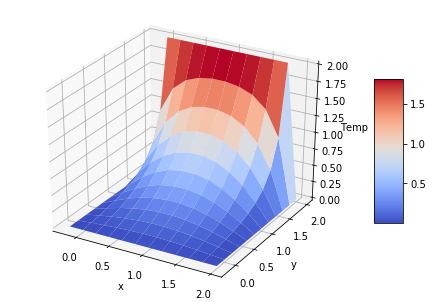

In [4]:
"""ecuación de laplace en dominio rectangular"""
import numpy as np

Lx=2;   Ly=2;
nx=10; ny=10; # numero de nodos en c u de las direcciones



x=np.linspace( 0,Lx ,nx+1) #vector con las coord en x de los nodos
y=np.linspace( 0,Ly ,ny+1) #vector con las coord en x de los nodos
deltax=x[1]-x[0];
deltay=y[1]-y[0]

kappa=1;
n=np.size(x)-1; #numero de nodos por fila de la matriz
m=np.size(y)-1;#numero de nodos por columna de la matriz
nnod=(n)*(m); #número de nodos total de la matriz
A=np.zeros((nnod,nnod));
T=np.zeros ((m+2,n+2)); #matriz donde guardo la solución
RHS=np.zeros((nnod,1));
for j in range (m):    
    for i in range( n):
        k=i+j*(n);# print("i,j,k",i,j,k)
        A[k, k]=kappa*(2/deltax**2+2/deltay**2); #coef de phi_i,j
        if i!=n-1:A[k ,k+1]=-kappa/deltax**2;    #coef de phi_i+1,j
        if i!=0: A[k ,k-1]=-kappa/deltax**2; #coef de phi_i-1,j
        if j!=m-1: A[k ,k+(n)]=-kappa/deltay**2; #coef de phi_i,j+1
        if j!=m-1: A[k+(n) ,k]=-kappa/deltay**2;#coef de phi_i,j-1
   
A=A*deltax*deltay;
# condiciones de contorno
T[0, :]=0;
T[m+1,:]=2;
T[:,n+1]=0;
T[:, 0]=0;
#implementación de las mismas en el sist de ecs
RHS[0:n, 0]=RHS[0:n, 0]+T[0,1:n+1];
RHS[nnod-n:nnod, 0]=RHS[nnod-n:nnod, 0]+T[m+1,1:n+1];
RHS[0:n*(m):n,0]=RHS[0:n*(m):n,0]+T[1:m+1,0];
RHS[n-1:n*(m):n,0]=RHS[n-1:n*(m):n,0]+T[1:m+1,n+1];

#sol del sistema
Tu=np.linalg.solve(A ,RHS); #obtengo las temp en xi, yj como vector col

Tu=np.reshape (Tu,(n,m)); #transformo el vector col solucion en una matriz n*m
T[1:n+1,1:m+1]=Tu 

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%matplotlib inline

fig = plt.figure()
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)

x=np.append([-deltax], x)
y=np.append([-deltay], y)
X, Y = np.meshgrid(x, y)
# Plot the surface.
surf = ax.plot_surface(X, Y, T, cmap=cm.coolwarm)#,linewidth=0, antialiased=False)
ax.set_zlabel('Temp')
ax.set_xlabel('x')
ax.set_ylabel('y')
# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
print(T)
plt.show()

## Integración Temporal

En el caso de tener que resolver un problema inestacionario, por ejemplo el problema de transferencia de calor inestacionario en una barra

$$
 \parder{\varg}{t} = \alpha \pardder{\varg}{\xcoor},
$$

Al dominio espacial puede discretizarselo con una diferencia finita de cualquier clase, ya que como existen condiciones de contorno en ambos extremos del dominio puede determinarse la solución en el interior sin importar el tipo de discretización empleada

Sin embargo, en el dominio temporal es necesario ser más cuidadoso: tomando una diferencia hacia adelante en el tiempo (i.e., pasando de $t^{(n)}=n \cdot \Delta t$ a  $t^{(n+1)}=(n+1)\cdot \Delta t$ )
$$
 \parder{\varg}{t} = \frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}
$$
tenemos el problema de que no tenemos forma a priori de determinar $\varg_{i}^{(n+1)}$ ya que no tenemos condiciones de contorno más adelante en el tiempo.  De esta manera, **debemos determinar  $\varg_{i}^{(n+1)}$ en función de los datos que disponemos, i.e. $\varg_{i}^{(n)}$**. El problema radica en saber en qué instante evaluamos la derivada espacial del miembro derecho.

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}=\alpha \pardder{\varg}{\xcoor}(t=?)$$

En función de qué instante de tiempo usemos para evaluar el miembro derecho tendremos diferentes esquemas numéricos

#### Esquema Explícito *Forward Euler*
Si evaluamos el miembro derecho en $t^{(n)}$  tenemos

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}= \alpha\pardder{\varg}{\xcoor}(t=t^{(n)})=\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}$$

En este caso todos los valores de $\varg$ en el instante  $t^{(n)}$ son conocidos, y la ecuación asociada a cada nodo tiene una sola incógnita: $\varg_{i}^{(n+1)}$, que puede despejarse como

$$\varg_{i}^{(n+1)}=\varg_{i}^{(n)}+\alpha \frac{\Delta t}{{\Delta x}^2} \left[ \varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} \right] $$

Notar que **la evolución de $\varg$  en cada nodo para $t^{(n+1)}$ puede obtenerse independientemente de los valores en los vecinos**.Por esta razón se como *métodos explícitos*.

Este método se conoce como *Forward Euler* y es una extensión del método de Euler para ODEs 
$$ \frac{y^{(n+1)}-y^{(n)}}{\Delta t}=f(y_0, t^{(n)})$$

A continuación se muestra la molécula o stencil de cálculo asociado a este método.

![title](forward_euler.png)

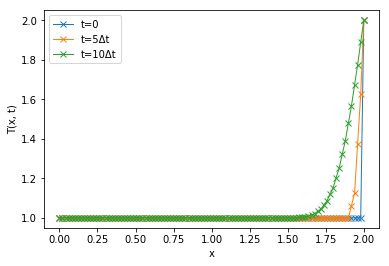

In [7]:
"""
Solución  de la conducción inestacionaria con diferencias finitas
"""
import numpy as np
import matplotlib.pyplot as plt
α=1; #difusividad térmica
L=2; 
nx=100 # numero de nodos en x
ndt=50 #numero de pasos de tiempo
Δx=L/(nx-1)
#Δt=0.1
Δt=1/2*Δx**2/α


T_sol=np.zeros((ndt,nx))

"""condiciones de contorno"""
T_0=1; T_L=2
T_sol[:,0]=T_0;
T_sol[:,nx-1]=T_L;

T_in=np.ones(nx-2) #condición inicial
T_sol[0,1:nx-1]=T_in

x_df=np.linspace(0, L, nx)
for j in range(0, ndt-1):
    for i in range(1, nx-1):
        T_sol[j+1,i]=T_sol[j,i]+ α*Δt/Δx**2*(T_sol[j,i-1]-2*T_sol[j, i]+T_sol[j,i+1])



"""
gráficos de las soluciones con pyplot
"""
plt.plot( x_df, T_sol[0, :], lw=1, marker='x')
plt.plot( x_df, T_sol[4, :], lw=1, marker='x')
plt.plot( x_df, T_sol[49, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('T(x, t)')
plt.gca().legend(('t=0','t=5Δt','t=10Δt'))
plt.show()

#### Esquema Implícito *Backward Euler*


Si evaluamos el miembro derecho en $t^{(n+1)}$  tenemos

$$\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}= \alpha\pardder{\varg}{\xcoor}(t=t^{(n+1)})=\alpha\frac{\varg_{i+1}^{(n+1)}-2\varg_{i}^{(n+1)}+\varg_{i-1}^{(n+1)} }{{\Delta x}^2}$$

En este caso, en la ecuación de cada nodo tenemos 3 incógnitas, de manera que el sistema queda acoplado, como se puede ver en el stencil del esquema

![title](backward_euler.png)


Se obtiene un sistema de ecuaciones lineales para obtener los $\varg_{k}^{(n+1)}$ de la forma


$$\left[1+  \frac{\alpha \Delta t}{{\Delta x}^2}\right] 2\varg_{i}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{i+1}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{i-1}^{(n+1)}=\varg_{i}^{(n)} $$

En el caso de tener condiciones de Dirichlet en los extremos las ecuaciones para el nodo 0 y el nodo $n$ son innecesarias, y el valor de los mismos aparece en el miembro derecho de las ecs de los nodos 1 y $n-1$
$$ \phi_0= T_0\rightarrow \quad
 \left[1+  \frac{\alpha \Delta t}{{\Delta x}^2}\right] 2\varg_{1}^{(n+1)}-\frac{\alpha \Delta t}{{\Delta x}^2}\varg_{2}^{(n+1)}=\varg_{i}^{(n)}+\frac{\alpha \Delta t}{{\Delta x}^2}T_{0}^{(n+1)}
$$

Vemos que el sistema de ecs da origen a una matriz tridiagonal con los elementos de la diagonal principal positivos y de mayor valor absoluto que los de las otras diagonales, que son negativos
Más adelante veremos la importancia de esta característica para la estabilidad del método.


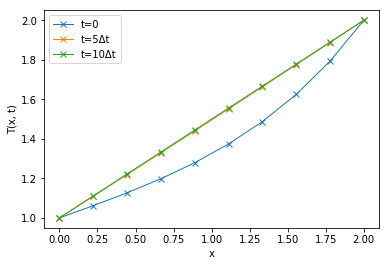

In [6]:
"""
Solución  de la conducción inestacionaria con diferencias finitas por método backward Euler
"""
import numpy as np
import matplotlib.pyplot as plt
α=1; #difusividad térmica
L=2; 
nx=10 # numero de nodos en x
ndt=10 #numero de pasos de tiempo
Δx=L/(nx-1)
Δt=1

T_sol=np.zeros((ndt+1,nx))  #cada fila representa la distr espacial de T para un instante dado

"""condiciones de contorno"""
T_0=1; T_L=2
T_sol[:,0]=T_0;
T_sol[:,nx-1]=T_L;

T_in=np.ones(nx-2) #condición inicial
T_sol[0,1:nx-1]=T_in

#print(T_sol)
""" ensamble de la matriz de coeficientes """
M=np.zeros((nx-2, nx-2))
RHS=np.zeros((nx-2, 1))

M[0,0]=1+2*α*Δt/Δx**2 ## primera fila (depende de las BC)
M[0,1]=-α*Δt/Δx**2
for i in range (1,nx-3):
    M[i,i]=1+2*α*Δt/Δx**2;
    M[i,i-1]=-α*Δt/Δx**2
    M[i,i+1]=-α*Δt/Δx**2

M[nx-3,nx-3]=1+2*α*Δt/Δx**2; #ultima fila (depende de las BCs)
M[nx-3,nx-4]=-α*Δt/Δx**2

#RHS=T_sol[0,1:nx-1]

x_df=np.linspace(0, L, nx)
for j in range(0, ndt):
    RHS[:,0]=T_sol[j,1:nx-1] #armo vector de términos indeptes (sumo phi_i, n)
    RHS[0,0]= RHS[0]+α*Δt/Δx**2*T_sol[j,0] #BC izq
    RHS[nx-3,0]= RHS[nx-3]+α*Δt/Δx**2*T_sol[j,nx-1] #BC der
    #print("RHS=",RHS)
    T_u=np.linalg.solve(M, RHS).transpose()
    T_sol[j+1,1:nx-1]=T_u


"""
gráficos de las soluciones con pyplot
"""
plt.plot( x_df, T_sol[1, :], lw=1, marker='x')
plt.plot( x_df, T_sol[4, :], lw=1, marker='x')
plt.plot( x_df, T_sol[9, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('T(x, t)')
plt.gca().legend(('t=0','t=5Δt','t=10Δt'))
plt.show()

## Propiedades de los esquemas numéricos

### Convergencia

Un esquema numérico es convergente si la solución discreta tiende a la exacta (analítica) a medida que los pasos de discretización espacial y temporal tienden a cero

$$lim_{\Delta x\rightarrow 0}(lim_{\Delta t\rightarrow 0} \phi_i^{(n)} )= \phi(x_i, t^ {(n)})$$ 

**En gral suele ser difícil (o sino imposible) de evaluar**

### Consistencia

Un esquema numérico es  *consistente* con la ecuación diferencial que aproxima si en el límite donde los pasos de discretización espaciales y temporal tienden a cero, el sistema de ecuaciones algebraicas es equivalente a la ecuación diferencial en cada punto de la grilla.

Siendo $\mathcal{L}(x,t)$ el operador diferencial analítico (contínuo) y $ L(x_i,t^{(n)})$  su operador análogo discreto, debe cumplirse

$$ \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} L(x_i, t^{(n)})= \mathcal{L}(x,t) $$


#### Ejemplo: esquema forward Euler para la ec del calor inestacionaria

$$L(x_i, t^{(n)})=\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}-\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}$$


$$ \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} L(x_i, t^{(n)})= \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} \left[\frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}-\alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2} \right]$$

siendo que, por definición
$$ \lim_{\Delta t \rightarrow 0} \frac{\varg_{i}^{(n+1)}-\varg_{i}^{(n)}}{\Delta t}=\parder{\phi}{t}$$
 y por otro lado
 $$\begin{aligned}
 \lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0}
 \alpha\frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+\varg_{i-1}^{(n)} }{{\Delta x}^2}&=lim_{\Delta x\rightarrow 0}\lim_{\Delta t \rightarrow 0} \frac{1}{\Delta x}\frac{(\varg_{i+1}^{(n)}-\varg_{i}^{(n)})-(\varg_{i}^{(n)}-\varg_{i-1}^{(n)}) }{{\Delta x}}\\
 &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{1}{\Delta x}\left[ \lim_{\Delta x \rightarrow 0}\frac{(\varg_{i+1}^{(n)}-\varg_{i}^{(n)})}{\Delta x}-\lim_{\Delta x \rightarrow 0}\frac{(\varg_{i}^{(n)}-\varg_{i-1}^{(n)}) }{\Delta x}\right]\\
 &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{1}{\Delta x}\left[ \parder{\phi}{x}_{x_i}-\parder{\phi}{x}_{x_{i-1}}\right]\\
  &= lim_{\Delta t\rightarrow 0}\lim_{\Delta x \rightarrow 0}\frac{\left[ \parder{\phi}{x}_{x_i}-\parder{\phi}{x}_{x_{i-1}}\right]}{\Delta x}\\
  &=\pardder{\phi}{x}
 \end{aligned}$$
 
 ### Estabilidad
 
 Es la propiedad de un esquema de que, si existe una perturbación $\epsilon$ en la evaluación del mismo, el error producido por ésta se mantiene acotado en el tiempo y en el espacio.
 
$$\tilde{\varg}(x_i)={\varg}(x_i)+  \epsilon(x_i)$$

Siendo $\tilde{\varg}(x_i)$ la *aproximación computacional* de la solución numérica.El origen del error puede deberse al error de redondeo en operaciones, aproximación inexacta de funciones transcendentales o números irracionales, etc. 

Si el esquema numérico es lineal, entonces el error reproduce la misma ecuación

#### Ejemplo:

$$ \begin{aligned} \frac{\tilde\varg_{i}^{(n+1)}-\tilde\varg_{i}^{(n)}}{\Delta t}&=\alpha\frac{\tilde\varg_{i+1}^{(n)}-2\tilde\varg_{i}^{(n)}+\tilde\varg_{i-1}^{(n)} }{{\Delta x}^2} \\ 
\frac{\varg_{i}^{(n+1)}+ \epsilon(x_i, t^{(n+1)})-\varg_{i}^{(n)}- \epsilon(x_i, t^{(n)})}{\Delta t}&=\alpha\frac{\varg_{i+1}^{(n)}  +\epsilon(x_{i+1}, t^{(n)})-2\varg_{i}^{(n)}-2\epsilon(x_{i+1}, t^{(n)})+\varg_{i-1}^{(n)}+\epsilon(x_{i+1}, t^{(n)}) }{{\Delta x}^2} \\
\frac{ \epsilon(x_i, t^{(n+1)})- \epsilon(x_i, t^{(n)})}{\Delta t}&=\alpha\frac{  \epsilon(x_{i+1}, t^{(n)})-2\epsilon(x_{i+1}, t^{(n)})+\epsilon(x_{i+1}, t^{(n)}) }{{\Delta x}^2} 
\end{aligned}
$$

### Análisis de Estabilidad de Von Neumann

Se propone que el error en cada punto puede expresarse mediante una serie de Fourier
$$
\begin{equation}
 \epsilon_i^n = \sum_{m=1}^{M-2} a^n_m \exp \left(\ii \theta_m i  \right), \qquad i = 2,3,\dots,M-1,
\end{equation}$$
siendo $\ii = \sqrt{-1}$ la unidad imaginaria, $a^n_m$ la amplitud del modo $m$ en el instante $t^n$ y $\theta_m = m \pi \Delta x/L$ el número de onda $m$.

Si $\epsilon_i^{(n+1)}<\epsilon_i^{(n)}$ para cualquier i, entonces el esquema numérico es estable

### Teorema de Equivalencia de Lax


*Dado un  problema de valores   iniciales **lineal**  bien condicionado y una aproximación en diferencias finitas que satisface la condición  de consistencia, **la estabilidad es la  condición  necesaria  y  suficiente   para  que  se satisfaga   la  convergencia**.*  

Si el problema es no lineal, el teorema no está demostrado para el caso gral, pero se sabe que la consistencia y la estabilidad son **condiciones necesarias** para la convergencia 
 